# RNN modeling

In [1]:
!pip install -r requirements.txt

In [2]:
## Importing Dependencies
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
## generate time series dataset
def generate_time_series(batch_size, n_steps):
    # uniform distribution between 0 and 1
    freq1, freq2, offset1, offset2= np.random.rand(4, batch_size, 1)  
    time= np.linspace(0, 1, n_steps)
    series= 0.5*np.sin((time-offset1)*(freq1*10 + 10)) # sine curve 1
    series += 0.2*np.sin((time-offset2)*(freq2*20 + 20)) # + sine curve 2
    series += 0.1*(np.random.rand(batch_size, n_steps)-0.5) # + bias
    return series[..., np.newaxis].astype(np.float32)

In [4]:
## generate datasets of train, validation, test
n_steps= 50
series= generate_time_series(10000, n_steps+1)
X_train, y_train= series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid= series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test= series[9000:, :n_steps], series[9000:, -1]

In [5]:
print('shape of datasets : batch_size {} / n_steps {} / dimensionality {}'.\
    format(series.shape[0], series.shape[1], series.shape[2]))
print('shape of X_train : \
    batch_size {} / n_steps {} / dimensionality {}'.\
    format(X_train.shape[0], X_train.shape[1], X_train.shape[2]))
print('shape of y_train : batch_size {} / dimensionality {}'.\
    format(y_train.shape[0], y_train.shape[1]))

shape of datasets : batch_size 10000 / n_steps 51 / dimensionality 1
shape of X_train :     batch_size 7000 / n_steps 50 / dimensionality 1
shape of y_train : batch_size 7000 / dimensionality 1


## Simple Dense

In [6]:
model= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=list(X_train.shape[-2:])),
    tf.keras.layers.Dense(1)
    ])

model.compile(loss=tf.losses.MeanSquaredError(),
            optimizer=tf.optimizers.Adam(),
            metrics=[tf.metrics.MeanAbsoluteError()])

EPOCHS=20
history = model.fit(X_train, y_train, validation_split=0.25, epochs=EPOCHS, verbose=1)

Epoch 1/20
165/165 [==============================] - 1s 4ms/step - loss: 0.2578 - mean_absolute_error: 0.4073 - val_loss: 0.0769 - val_mean_absolute_error: 0.2271
Epoch 2/20
165/165 [==============================] - 0s 3ms/step - loss: 0.0556 - mean_absolute_error: 0.1894 - val_loss: 0.0431 - val_mean_absolute_error: 0.1680
Epoch 3/20
165/165 [==============================] - 0s 3ms/step - loss: 0.0364 - mean_absolute_error: 0.1533 - val_loss: 0.0312 - val_mean_absolute_error: 0.1444
Epoch 4/20
165/165 [==============================] - 0s 3ms/step - loss: 0.0273 - mean_absolute_error: 0.1346 - val_loss: 0.0249 - val_mean_absolute_error: 0.1295
Epoch 5/20
165/165 [==============================] - 0s 3ms/step - loss: 0.0220 - mean_absolute_error: 0.1214 - val_loss: 0.0209 - val_mean_absolute_error: 0.1186
Epoch 6/20
165/165 [==============================] - 0s 3ms/step - loss: 0.0187 - mean_absolute_error: 0.1115 - val_loss: 0.0182 - val_mean_absolute_error: 0.1107
Epoch 7/20
165/1

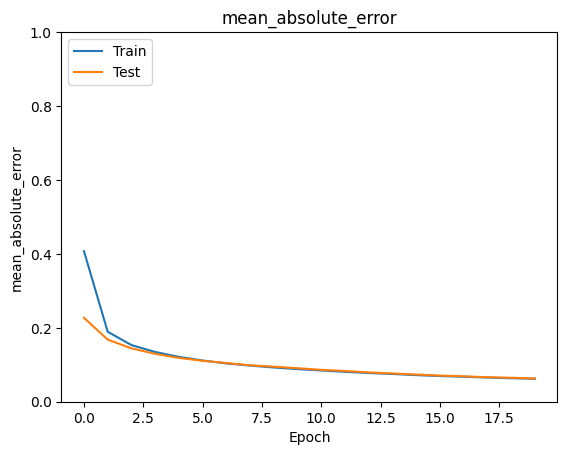

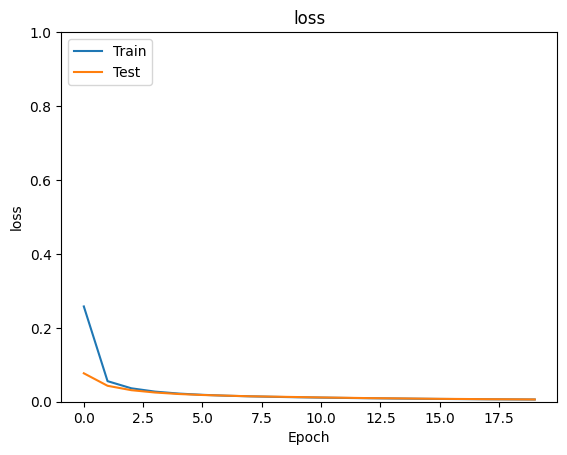

In [7]:
## visualize results of training 
def visualize_result(result, val_result):
    plt.plot(history.history[result])
    plt.plot(history.history[val_result])
    plt.title(str(result))
    plt.xlabel('Epoch')
    plt.ylabel(str(result))
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.ylim(0,1)
    plt.show()

visualize_result('mean_absolute_error', 'val_mean_absolute_error')
visualize_result('loss', 'val_loss')

## Build Simple RNN

Epoch 1/20
165/165 [==============================] - 8s 46ms/step - loss: 0.2909 - mean_absolute_error: 0.4647 - val_loss: 0.2677 - val_mean_absolute_error: 0.4440
Epoch 2/20
165/165 [==============================] - 7s 41ms/step - loss: 0.2576 - mean_absolute_error: 0.4375 - val_loss: 0.2370 - val_mean_absolute_error: 0.4178
Epoch 3/20
165/165 [==============================] - 9s 52ms/step - loss: 0.2273 - mean_absolute_error: 0.4110 - val_loss: 0.2092 - val_mean_absolute_error: 0.3929
Epoch 4/20
165/165 [==============================] - 8s 46ms/step - loss: 0.1999 - mean_absolute_error: 0.3859 - val_loss: 0.1831 - val_mean_absolute_error: 0.3679
Epoch 5/20
165/165 [==============================] - 8s 45ms/step - loss: 0.1760 - mean_absolute_error: 0.3628 - val_loss: 0.1624 - val_mean_absolute_error: 0.3475
Epoch 6/20
165/165 [==============================] - 7s 45ms/step - loss: 0.1554 - mean_absolute_error: 0.3414 - val_loss: 0.1446 - val_mean_absolute_error: 0.3288
Epoch 7/20

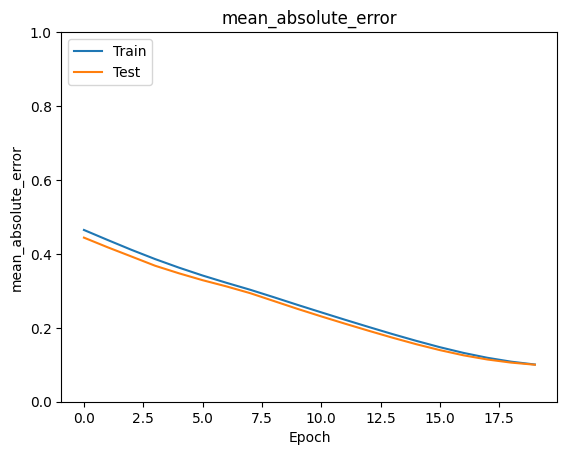

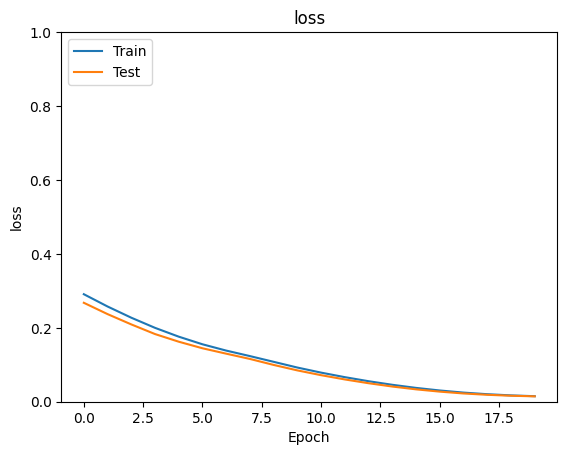

In [8]:
model= tf.keras.Sequential([
    ## Basically, SimpleRNN layer uses 'Hyperbolic tangent function' as activation.
    tf.keras.layers.SimpleRNN(1, input_shape=[None, 1]) 
    ])
model.compile(loss=tf.losses.MeanSquaredError(),
            optimizer=tf.optimizers.Adam(),
            metrics=[tf.metrics.MeanAbsoluteError()])

EPOCHS=20
history = model.fit(X_train, y_train, validation_split=0.25, epochs=EPOCHS, verbose=1)
visualize_result('mean_absolute_error', 'val_mean_absolute_error')
visualize_result('loss', 'val_loss')

## Build Deep RNN

Epoch 1/20
165/165 [==============================] - 33s 187ms/step - loss: 0.1106 - mean_absolute_error: 0.2614 - val_loss: 0.0855 - val_mean_absolute_error: 0.2362
Epoch 2/20
165/165 [==============================] - 29s 178ms/step - loss: 0.0825 - mean_absolute_error: 0.2320 - val_loss: 0.0834 - val_mean_absolute_error: 0.2330
Epoch 3/20
165/165 [==============================] - 30s 184ms/step - loss: 0.0809 - mean_absolute_error: 0.2300 - val_loss: 0.0832 - val_mean_absolute_error: 0.2344
Epoch 4/20
165/165 [==============================] - 29s 174ms/step - loss: 0.0800 - mean_absolute_error: 0.2290 - val_loss: 0.0824 - val_mean_absolute_error: 0.2318
Epoch 5/20
165/165 [==============================] - 30s 182ms/step - loss: 0.0792 - mean_absolute_error: 0.2277 - val_loss: 0.0823 - val_mean_absolute_error: 0.2314
Epoch 6/20
165/165 [==============================] - 30s 181ms/step - loss: 0.0790 - mean_absolute_error: 0.2275 - val_loss: 0.0813 - val_mean_absolute_error: 0.230

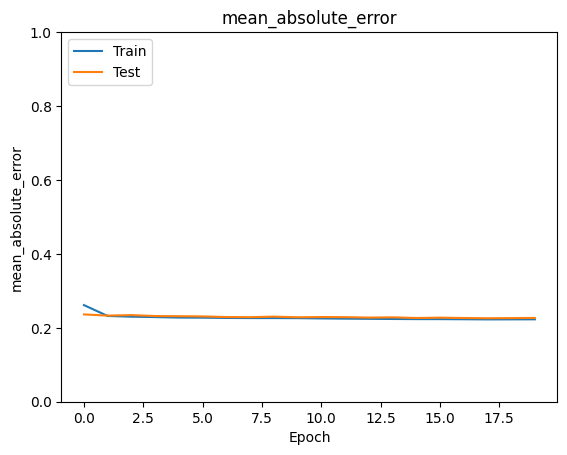

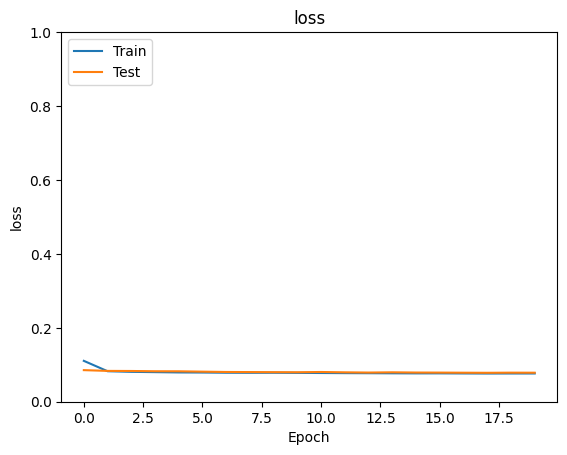

In [23]:
model= tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]), 
    tf.keras.layers.SimpleRNN(20, return_sequences=True), 
    tf.keras.layers.SimpleRNN(1) 
    ])
model.compile(loss=tf.losses.MeanSquaredError(),
            optimizer=tf.optimizers.Adam(),
            metrics=[tf.metrics.MeanAbsoluteError()])

EPOCHS=20
history = model.fit(X_train, y_train, validation_split=0.25, epochs=EPOCHS, verbose=1)
visualize_result('mean_absolute_error', 'val_mean_absolute_error')
visualize_result('loss', 'val_loss')

## multi-step prediction model

### using for loop and single-step prediction model

In [51]:
series= generate_time_series(1, n_steps + 10)
X_new, Y_new= series[:, :n_steps], series[:, n_steps:]
X= X_new
for step_ahead in range(10):
    y_pred_one= model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X= np.concatenate([X, y_pred_one], axis=1)

1/1 [==============================] - 0s 38ms/step


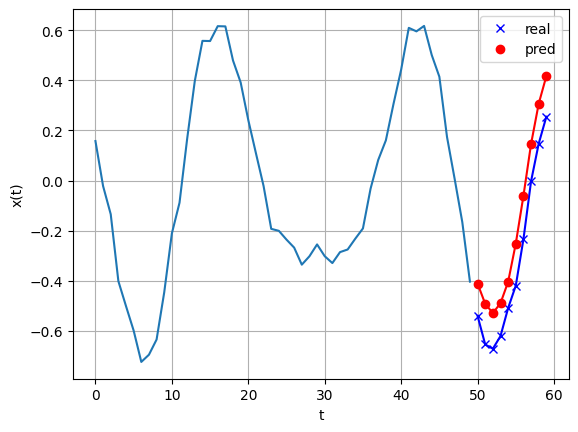

In [52]:
history= np.squeeze(series)[:n_steps]
y_new= np.squeeze(series)[n_steps:]
y_graph_pred= np.squeeze(y_pred)

def visaulize_pred(n_steps, history, y_new, y_graph_pred):
    plt.plot(np.arange(n_steps), history)
    plt.plot(np.arange(n_steps, n_steps+10), y_new, color='blue')
    plt.plot(np.arange(n_steps, n_steps+10), y_graph_pred, color='red')
    plt.plot(np.arange(n_steps, n_steps+10), y_new, 'bx', label='real')
    plt.plot(np.arange(n_steps, n_steps+10), y_graph_pred, 'ro', label='pred')
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

visaulize_pred(n_steps, history, y_new, y_graph_pred)

In [53]:
m = tf.keras.metrics.RootMeanSquaredError()
m.update_state(list(y_new), list(y_graph_pred))
m.result().numpy()

0.14958762

## multi-step RNN model

1/1 [==============================] - 0s 218ms/step
Epoch 1/20
165/165 [==============================] - 20s 113ms/step - loss: 0.0739 - mean_absolute_error: 0.2103 - val_loss: 0.0411 - val_mean_absolute_error: 0.1607
Epoch 2/20
165/165 [==============================] - 19s 114ms/step - loss: 0.0345 - mean_absolute_error: 0.1450 - val_loss: 0.0303 - val_mean_absolute_error: 0.1348
Epoch 3/20
165/165 [==============================] - 19s 113ms/step - loss: 0.0243 - mean_absolute_error: 0.1207 - val_loss: 0.0205 - val_mean_absolute_error: 0.1113
Epoch 4/20
165/165 [==============================] - 18s 112ms/step - loss: 0.0184 - mean_absolute_error: 0.1049 - val_loss: 0.0178 - val_mean_absolute_error: 0.1038
Epoch 5/20
165/165 [==============================] - 18s 110ms/step - loss: 0.0152 - mean_absolute_error: 0.0954 - val_loss: 0.0147 - val_mean_absolute_error: 0.0948
Epoch 6/20
165/165 [==============================] - 18s 111ms/step - loss: 0.0133 - mean_absolute_error: 0.089

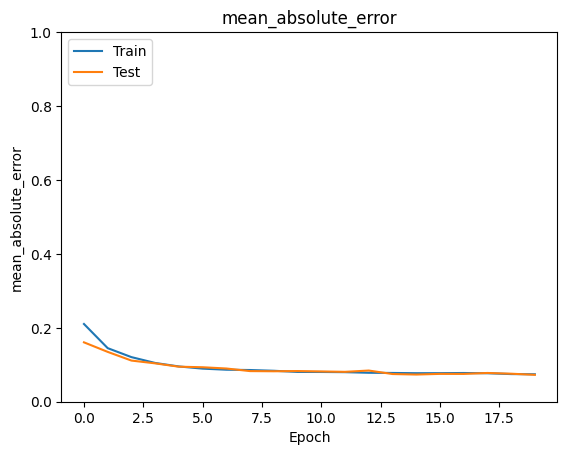

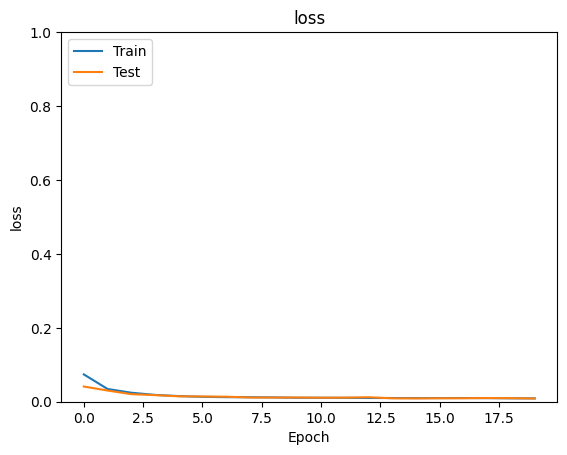

In [12]:
n_steps= 50
series= generate_time_series(10000, n_steps+10)
X_train, y_train= series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, y_valid= series[7000:9000, :n_steps], series[7000:9000, -10, 0]
X_test, y_test= series[9000:, :n_steps], series[9000:, -10, 0] 

model= tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]), 
    tf.keras.layers.SimpleRNN(20), 
    tf.keras.layers.Dense(10) 
    ])
model.compile(loss=tf.losses.MeanSquaredError(),
            optimizer=tf.optimizers.Adam(),
            metrics=[tf.metrics.MeanAbsoluteError()])
y_pred= model.predict(X_new)

EPOCHS=20
history = model.fit(X_train, y_train, validation_split=0.25, epochs=EPOCHS, verbose=1)

visualize_result('mean_absolute_error', 'val_mean_absolute_error')
visualize_result('loss', 'val_loss')

1/1 [==============================] - 0s 28ms/step


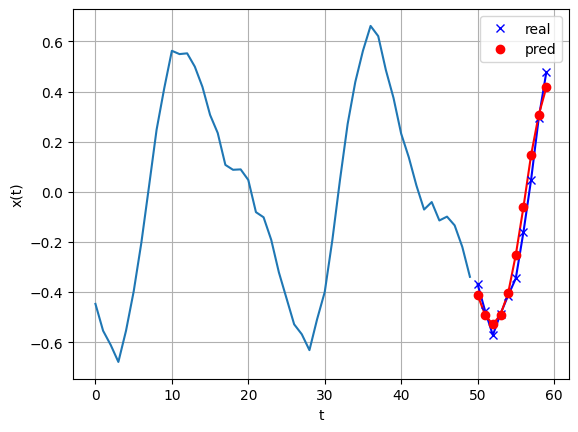

In [13]:
series= generate_time_series(1, n_steps + 10)
X_new, Y_new= series[:, :n_steps], series[:, n_steps:]
y_pred= model.predict(X_new)

history= np.squeeze(X_new)
y_new= np.squeeze(Y_new)
y_graph_pred= np.squeeze(y_pred)
visaulize_pred(n_steps, history, y_new, y_graph_pred)

In [14]:
m = tf.keras.metrics.RootMeanSquaredError()
m.update_state(list(y_new), list(y_graph_pred))
m.result().numpy()

0.060330436